# Spatiotemporal CNN-RNN Proxy Model for CO2 Monitoring
### Misael M. Morales, The University of Texas at Austin
Morales, M.M., Torres-Verdin, C., and Pyrcz, M. J. (2024) Stochastic pix2vid: A new spatiotemporal deep learning method for image-to-video synthesis in geologic CO2 storage prediction
***

In [1]:
from pix2vid import *
check_tensorflow_gpu()

proxy = SpatiotemporalCO2()
proxy.__dict__

2024-03-15 20:01:55.749969: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 20:01:55.750029: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 20:01:55.791112: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-15 20:01:55.871919: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-15 20:01:56.816090: W tensorflow/compiler/tf2

... Checking Tensorflow Version ...
Tensorflow built with CUDA? True
TF: 2.15.0 | CUDA: 12.2 | cuDNN: 8
# GPU available: 1 (NVIDIA GeForce RTX 3080)
--------------------------------------


2024-03-15 20:01:58.239911: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-15 20:01:58.369495: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-15 20:01:58.369551: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-15 20:01:58.372913: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-15 20:01:58.373044: I external/local_xla/xla/stream_executor

{'input_features_dir': 'simulations2D/input_features',
 'output_targets_dir': 'simulations2D/output_targets',
 'x_data_labels': ['Poro', 'LogPerm', 'Facies', 'Wells'],
 'y_data_labels': ['Pressure', 'Saturation'],
 'x_cmaps': ['jet', 'jet', 'viridis', 'binary'],
 'y_cmaps': ['jet', 'jet'],
 'err_cmap': 'binary',
 'latent_cmap': ['afmhot_r', 'gray'],
 'return_data': False,
 'save_model': True,
 'n_samples': 1000,
 'x_channels': 4,
 'y_channels': 2,
 'timesteps': 60,
 'dim': 64,
 'test_size': 0.25,
 't_samples': [0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60],
 'cnn_filters': [64, 128, 256],
 'rnn_filters': [256, 128, 64],
 'conv_groups': 1,
 'rnn_dropout': 0.05,
 'up_interp': 'nearest',
 'optimizer': <tensorflow_addons.optimizers.weight_decay_optimizers.AdamW at 0x7f68e1679160>,
 'criterion': <bound method SpatiotemporalCO2.custom_loss of <utils.SpatiotemporalCO2 object at 0x7f697f7a33a0>>,
 'L1L2_split': 0.33,
 'ridge_alpha': 0.66,
 'regular': <keras.src.regularizers.L1 at 0x7f68dedd3e50>,


In [2]:
proxy.load_data()
proxy.process_data()

... Loading Full Dataset ...
X: (1000, 64, 64, 4) | y: (1000, 60, 64, 64, 2)
Data Augmentation Done!    - n_samples=2,000
MinMax Normalization Done! - [0.0, 1.0]
Train - X: (1500, 64, 64, 4) | y: (1500, 11, 64, 64, 2)
Test  - X: (500, 64, 64, 4)  | y: (500, 11, 64, 64, 2)


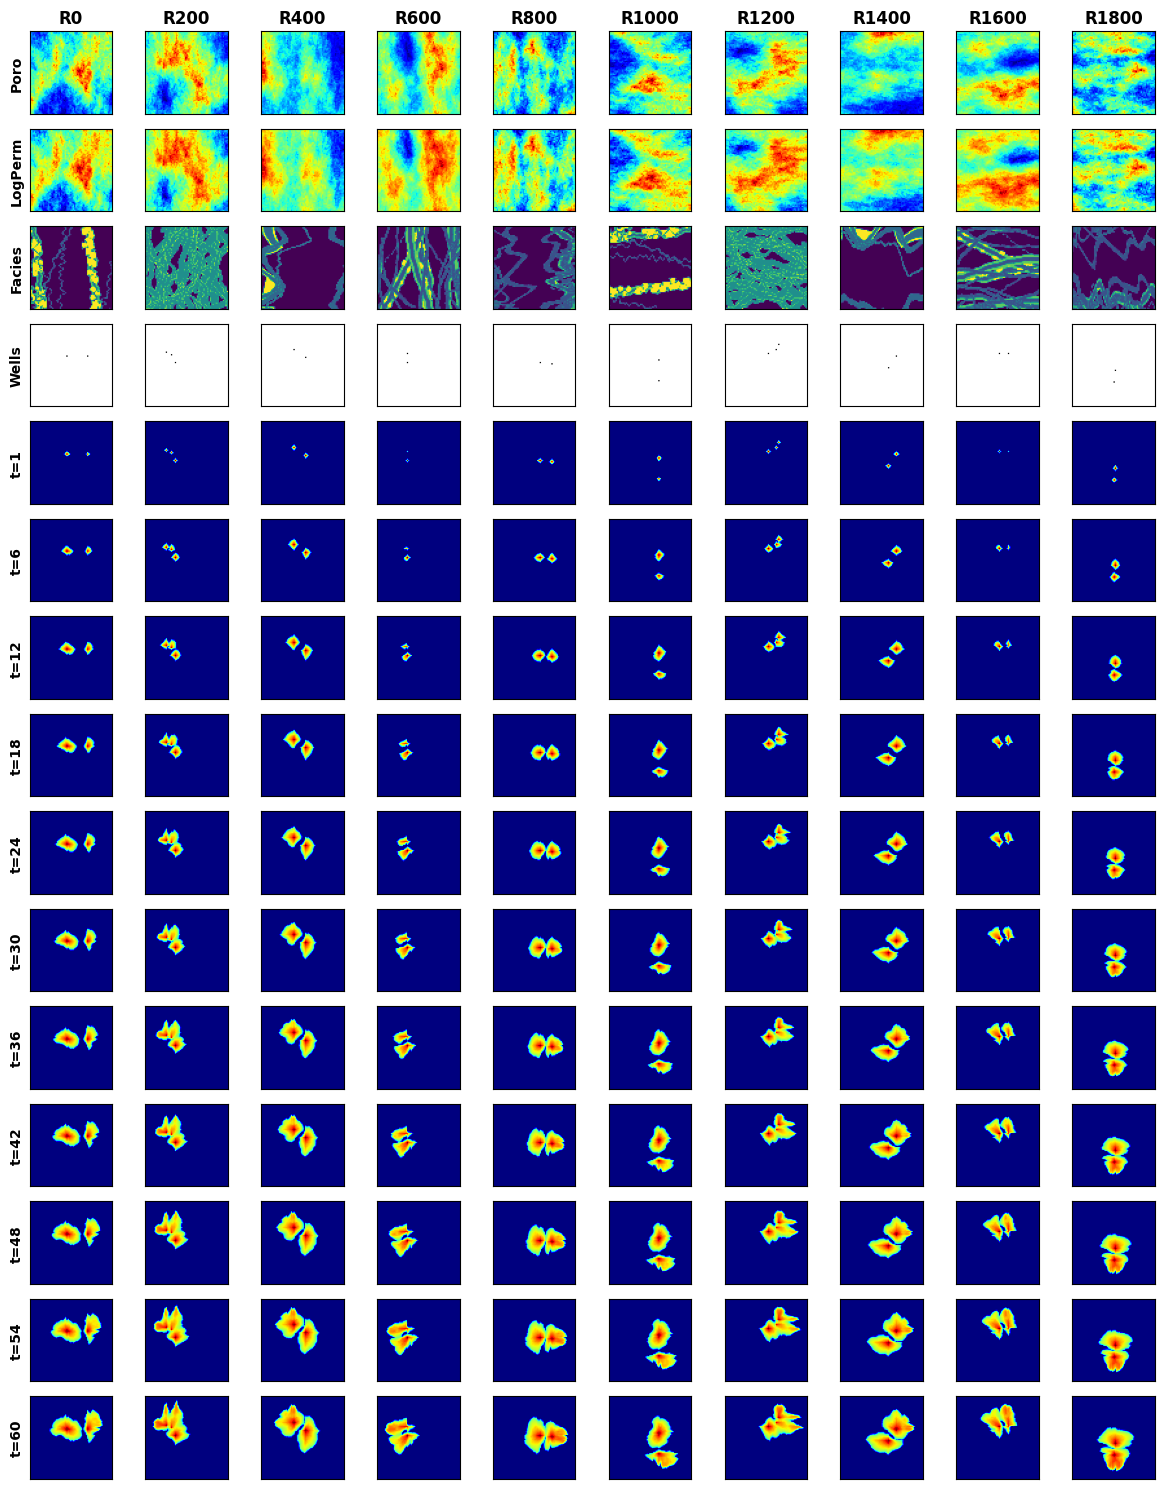

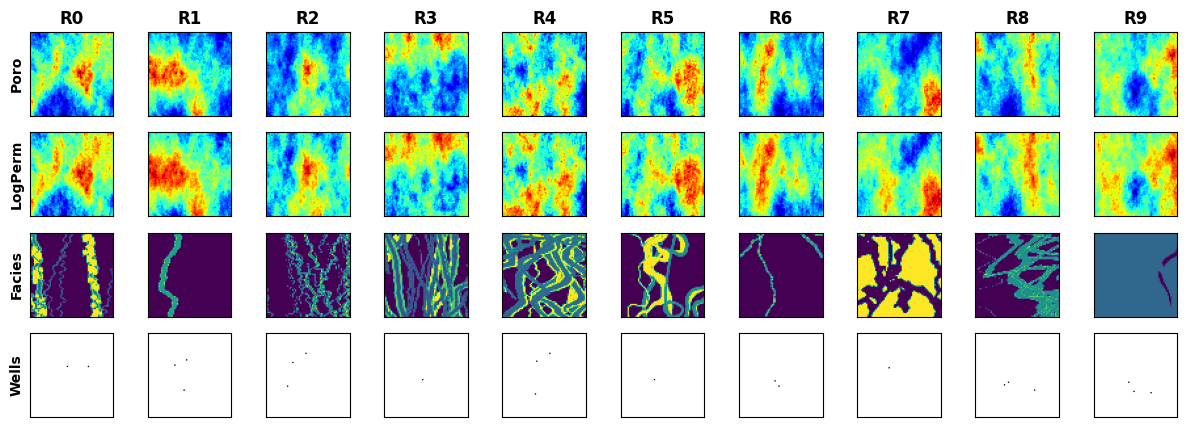

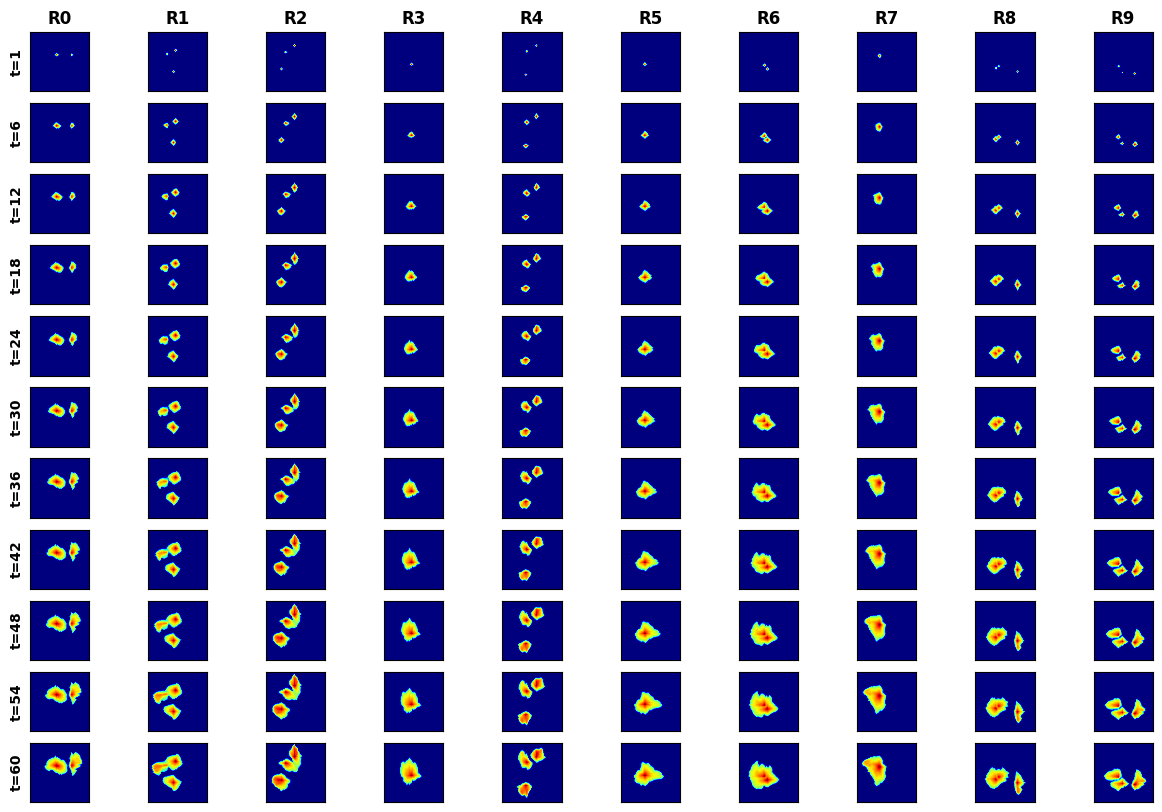

In [3]:
proxy.plot_data()
proxy.plot_features()
proxy.plot_targets()

In [4]:
proxy.make_model()
proxy.model.load_weights('stochastic_pix2vid_weights.h5')
# proxy.training()

2024-03-15 20:02:51.492705: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-15 20:02:51.492845: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-15 20:02:51.492882: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-15 20:02:51.493082: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-15 20:02:51.493094: I tensorflow/core/common_runtime/gpu/gpu

In [5]:
proxy.predictions()

2024-03-15 20:03:20.309843: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-03-15 20:03:20.616952: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: Permission denied


16/16 [==============================] - 3s 212ms/step
Train pred: (1500, 11, 64, 64, 2) | Test pred: (500, 11, 64, 64, 2)
MSE  | Train: 9.33e-04, Test: 9.35e-04
SSIM | Train: 96.95, Test: 96.96


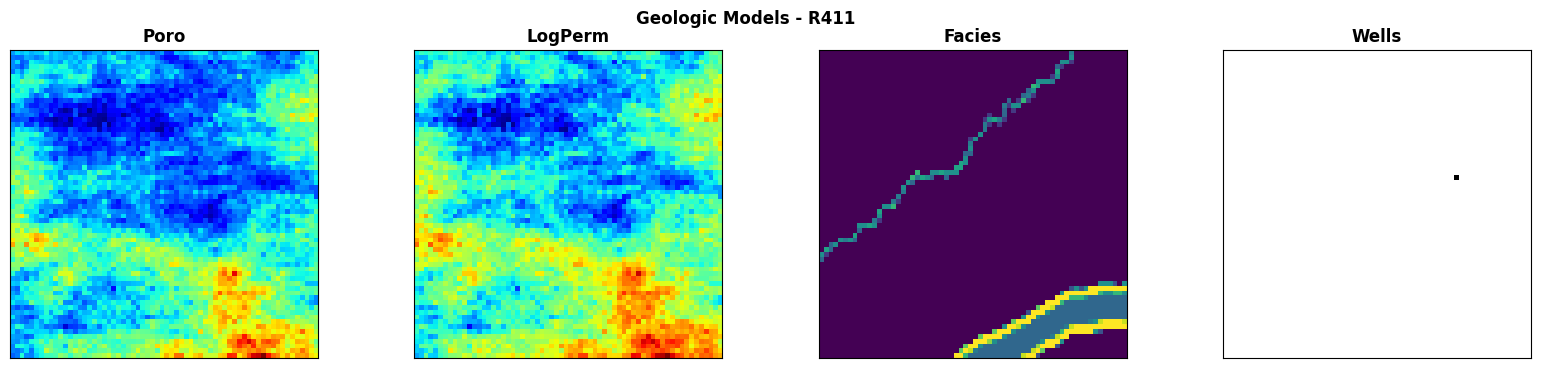

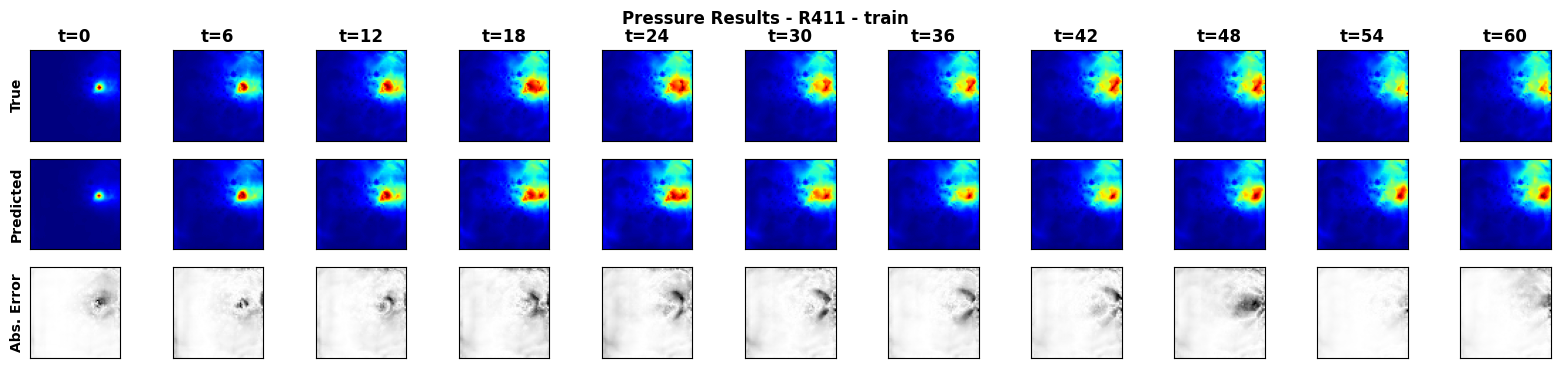

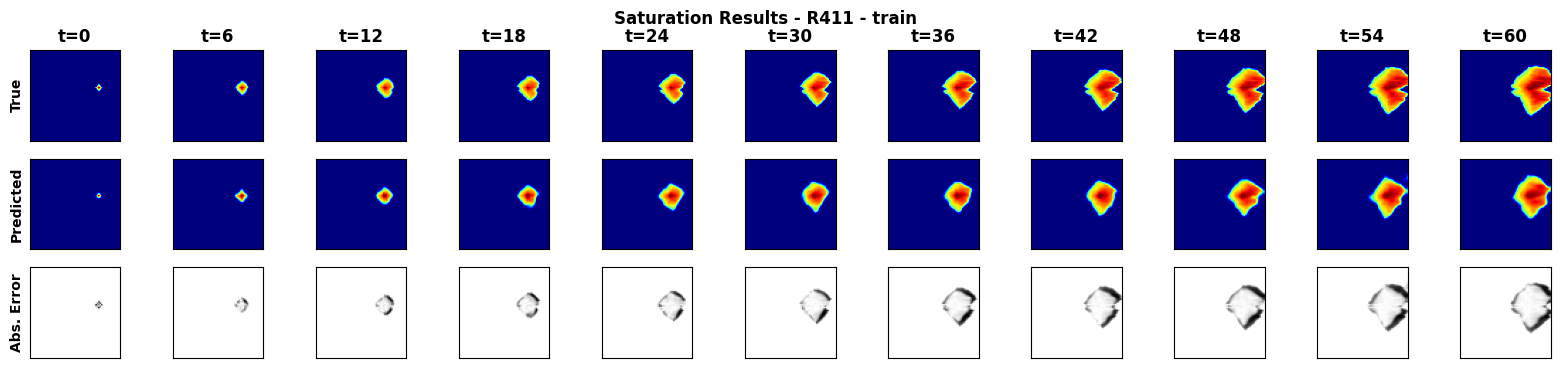

In [6]:
proxy.plot_single_results(411, 'train')

Train - Mean CO2 Injected: True: 4775.09 | Pred: 4812.64
Test  - Mean CO2 Injected: True: 4757.19 | Pred: 4800.38


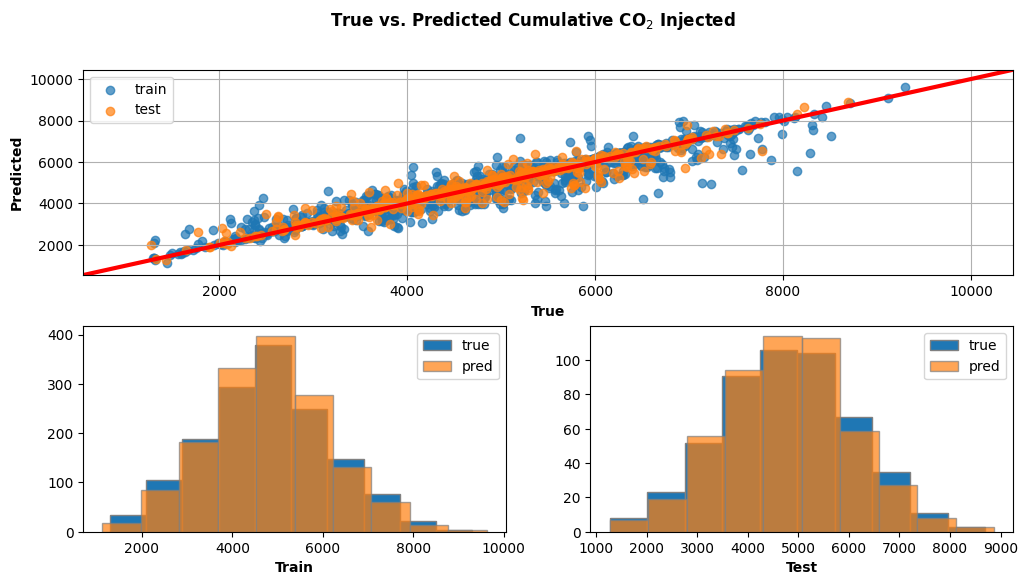

In [7]:
proxy.cumulative_co2()

***
# END